# Desafio: Descubra quem fez o ENEM 2016 apenas para treino

![ENEM](https://upload.wikimedia.org/wikipedia/pt/8/80/Enem_logo.png)

## 1. Importação das bibliotecas

In [37]:
#Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Ajuste para visualizar todas as colunas

pd.set_option("display.max_columns",200)

from IPython.core.pylabtools import figsize

sns.set(style="darkgrid")

## 2. Manipulação dos dados

In [170]:
# Carregando datasets

treino = pd.read_csv('../enem-4/train.csv')
teste = pd.read_csv('../enem-4/test.csv') 

In [4]:
# Linhas e colunas dos datasets

print('Shape dados treino{}' .format(treino.shape))
print('\nShape dados treino{}' .format(teste.shape))

Shape dados treino(13730, 167)

Shape dados treino(4570, 43)


In [5]:
#Head treino

treino.head(5)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [6]:
#Head teste

teste.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


In [7]:
#Vamos filtrar apenas as colunas do dataset de treino que estão no dataset de teste

columns = [x for x in treino.columns if x in (teste.columns)]

treino_novo = treino[columns]

# Após o filtro
print('Shape dados treino{}' .format(treino_novo.shape))
print('\nShape dados treino{}' .format(teste.shape))

Shape dados treino(13730, 43)

Shape dados treino(4570, 43)


In [8]:
# Tabela com valores nulos.

null_table = pd.DataFrame({'Qtd_nulos_treino': treino_novo.isna().sum(),
                          'Porcentagem_nulos_treino': round(treino_novo.isna().mean()*100,2),
                          'Qtd_nulos_teste': teste.isna().sum(),
                          'Porcentagem_nulos_teste': round(teste.isna().mean()*100,2)}).sort_values(by = ['Porcentagem_nulos_treino'], ascending = False)

null_table

,Qtd_nulos_treino,Porcentagem_nulos_treino,Qtd_nulos_teste,Porcentagem_nulos_teste
TP_DEPENDENCIA_ADM_ESC,9448,68.81,3144,68.80
TP_ENSINO,9448,68.81,3144,68.80
Q027,7373,53.70,2437,53.33
NU_NOTA_COMP5,3597,26.20,1170,25.60
NU_NOTA_LC,3597,26.20,1170,25.60
TP_STATUS_REDACAO,3597,26.20,1170,25.60
NU_NOTA_COMP1,3597,26.20,1170,25.60
NU_NOTA_COMP2,3597,26.20,1170,25.60
NU_NOTA_COMP3,3597,26.20,1170,25.60
NU_NOTA_REDACAO,3597,26.20,1170,25.60


In [9]:
#Porém, agora é necessário adicionar a nossa coluna alvo 'TREINEIRO' no dataset de treino, pois ela foi removida
# após o filtro.

col = treino['IN_TREINEIRO']

treino_novo = pd.concat([treino_novo, col], axis = 1)

In [171]:
# Tratando os valores nulos.

#Irei excluir arbitrariamente as colunas com nulos >= 50%

nulls = ['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'Q027']

#Dados de treino
treino_novo.drop(columns=nulls, inplace = True, axis = 1)

#Dados de teste
teste.drop(columns=nulls, inplace = True, axis = 1)

In [172]:
#Agora, vou preencher com zeros o restante.

index = null_table[(null_table['Porcentagem_nulos_treino'] > 20) & (null_table['Porcentagem_nulos_treino'] < 50)].index

# Loop for em ambos os datasets
for i in index:
    treino_novo[i] = treino_novo[i].fillna(0)
    teste[i] = teste[i].fillna(0)

In [173]:
# Antes de excluir o número de inscrição do dataset de teste, vou salvá-la para posterior uso na submissão
# resposta

nu_inscricao = teste[['NU_INSCRICAO']]

# Drop da INSCRIÇÃO
teste.drop(columns = 'NU_INSCRICAO', axis = 1, inplace = True)
#treino_novo.drop(columns = 'NU_INSCRICAO', axis = 1, inplace = True)

#Drop da variável SG_UF_RESIDENCIA, pois já temos a mesma informação na SG_UF_RESIDENCIA
treino_novo.drop(columns = 'SG_UF_RESIDENCIA', axis =1, inplace = True)

In [13]:
treino_novo.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,IN_TREINEIRO
0,43,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,0
1,23,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,0
2,23,21,F,3,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,A,0
3,33,25,F,0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,D,0
4,13,28,M,2,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,A,0


In [14]:
# Variáveis categóricas

categoricals = ['CO_UF_RESIDENCIA', 'NU_IDADE','TP_SEXO' ,'TP_COR_RACA', 'TP_NACIONALIDADE','TP_ST_CONCLUSAO',
               'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
               'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN','TP_PRESENCA_CH',
               'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q006',
               'Q024','Q025','Q026','Q047']

## 3. Análise Exploratória 

* ### Importante: Como temos muitas variáveis categóricas, inclusive a variável target, não podemos utilizar a função corr() do pandas, visto que essa função compara apenas variáveis contínuas.

* ### Portanto, será necessário utilizar outro método: vou utilizar a técnica de distância por similaridade de coseno (Cosine Similarity). A referência pode ser encontrada no final deste jupyter.

In [15]:
# Transformando em variáveis categóricas

treino_categ = treino_novo[categoricals].astype('category')

#Vou transformar as variáveis que possuem strings em categóricas numéricas, para acessar os codes das categorias
cat_cols = ['TP_SEXO','Q001','Q002', 'Q006', 'Q024', 'Q025','Q026','Q047']

treino_categ[cat_cols] = treino_categ[cat_cols].apply(lambda x: x.cat.codes)

#Pronto, agora podemos fazer as devidas análises
treino_categ

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,43,24,1,1,1,1,4,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1.0,3,3,2,0,0,2,0
1,23,17,0,3,1,2,0,2,0,0,0,0,0,0,0,0,1,1,1,1,1,1.0,0,0,1,0,0,0,0
2,23,21,0,3,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,3,3,2,0,0,0,0
3,33,25,0,0,1,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,7,4,4,2,1,2,3
4,13,28,1,2,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,4,3,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,35,20,1,1,1,1,3,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1.0,4,4,6,1,1,1,0
13726,26,33,0,3,2,1,10,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1.0,0,0,2,0,1,1,0
13727,43,15,0,1,1,3,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1.0,2,6,1,0,1,0,0
13728,33,36,1,3,1,4,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1.0,1,3,6,1,1,2,0


In [16]:
#Aplicando a similaridade de coseno.

y = treino_novo['IN_TREINEIRO'].values
x = treino_categ.iloc[:,:-1].values

for row in x.T:
    
    resul = cosine_similarity(x.T, y.reshape(1,-1))

In [17]:
#Transformando  o resultado em DataFrame

cosine_df = pd.DataFrame(resul,  index = treino_categ.iloc[:,:-1].columns)
cosine_df = cosine_df.sort_values(by = 0, ascending= False)
cosine_df

,0
TP_ST_CONCLUSAO,0.543712
TP_PRESENCA_CH,0.356627
TP_PRESENCA_CN,0.356627
Q002,0.354362
TP_PRESENCA_LC,0.353723
TP_PRESENCA_MT,0.353723
TP_NACIONALIDADE,0.346471
Q001,0.337425
CO_UF_RESIDENCIA,0.333175
TP_COR_RACA,0.331059


### * Após aplicarmos o teste de similaridade de cosseno, o qual calcula a distância angular das coordenadas X e Y, ficou claro as variáveis que mais explicam a variável target Treineiro. 

### * Considerei um threshold de > 35%, ou seja, vou modelar apenas as variáveis que apresentam correlação acima de 35%:

In [134]:
treino_5 = cosine_df.iloc[:5]
treino_5

,0
TP_ST_CONCLUSAO,0.543712
TP_PRESENCA_CH,0.356627
TP_PRESENCA_CN,0.356627
Q002,0.354362
TP_PRESENCA_LC,0.353723


In [135]:
# Logo, temos nosso novo dataset de treio

treino_optimal = treino_categ[treino_5.index]

treino_optimal = pd.concat([treino_optimal, treino_novo['IN_TREINEIRO']], axis =  1)
treino_optimal

,TP_ST_CONCLUSAO,TP_PRESENCA_CH,TP_PRESENCA_CN,Q002,TP_PRESENCA_LC,IN_TREINEIRO
0,1,1,1,3,1,0
1,2,1,1,0,1,0
2,3,0,0,3,0,0
3,1,0,0,4,0,0
4,1,0,0,3,0,0
...,...,...,...,...,...,...
13725,1,1,1,4,1,0
13726,1,1,1,0,1,0
13727,3,1,1,6,1,1
13728,4,1,1,3,1,0


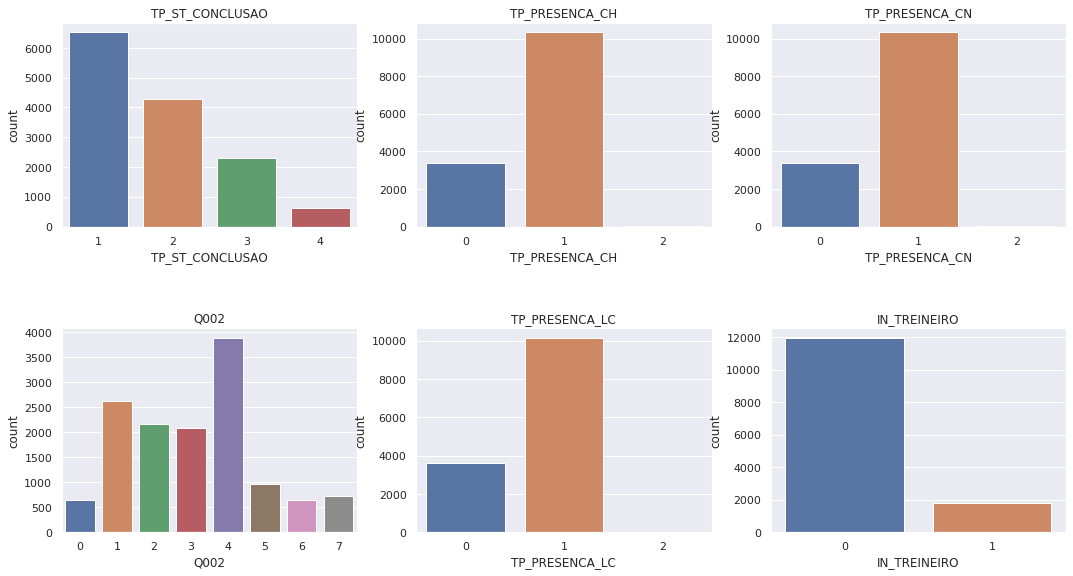

In [136]:
#Distribuição dos dados

columns = treino_optimal.columns

plt.subplots(figsize=(18,15))

length=len(columns)

for i,j in zip (columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(treino_optimal[i])
    plt.title(i)
    
plt.show()

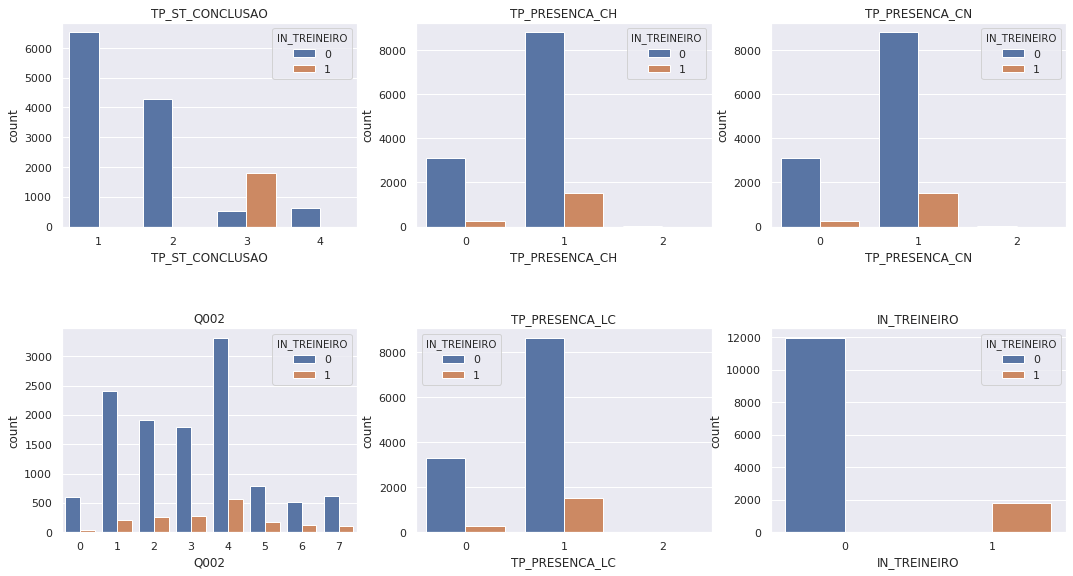

In [137]:
# Analisando todas as features do novo dataset para visualizar a distribuição de quem treinou ou  não na prova.

treino_1= treino_optimal[treino_optimal['IN_TREINEIRO']==1]

columns = treino_optimal.columns[:11]

plt.subplots(figsize=(18,15))

length=len(columns)

for i,j in zip (columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(treino_optimal[i], hue = treino_optimal['IN_TREINEIRO'])
    plt.title(i)
    
plt.show()

In [49]:
# A feature que mais explica a variabilidade da IN_TREINEIRO é TP_ST_CONCLUSAO'.
# Vamos transformar as categorias da 'situação de conclusão' pelas respectivas descrições contidas no
# dicionário de dados para melhor entender o gráfico.

di ={1: "Já concluí o Ensino Médio",
      2 : "Estou cursando e concluirei o Ensino Médio em 2016",
      3: "Estou cursando e concluirei o Ensino Médio após 2016",
      4: "Não concluí e não estou cursando o Ensino Médio"}

#Criando uma cópia do dataset
treino_copy = treino_optimal.copy()
treino_copy['TP_ST_CONCLUSAO'] = treino_copy['TP_ST_CONCLUSAO'].map(di)


#Vamos mudar a variável "IN_TREINEIRO" para melhor visualizar o plot
treineiro = {0: 'Não', 1: 'Sim'}

treino_copy['IN_TREINEIRO'] = treino_copy['IN_TREINEIRO'].map(treineiro)

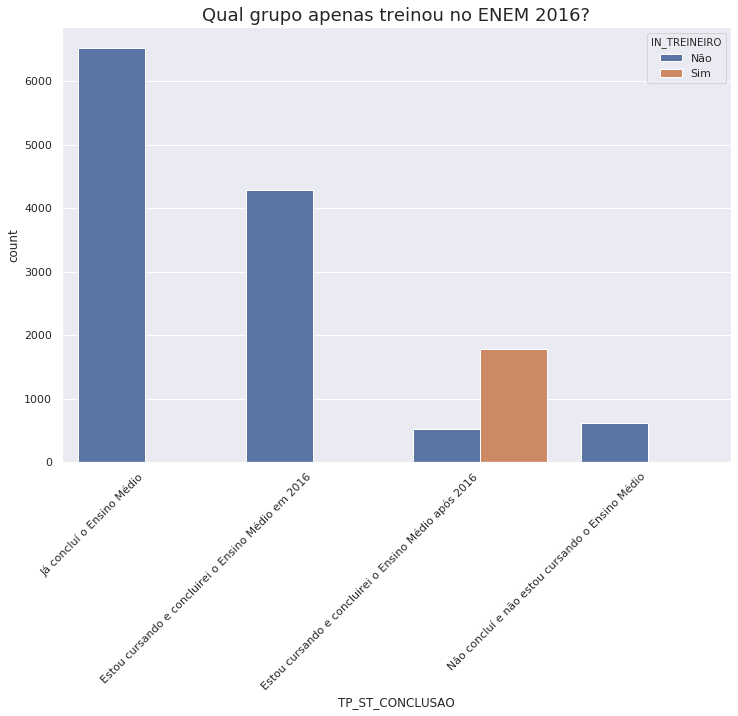

In [50]:
# Qual grupo apenas treinou no ENEM 2016?

# Plotagem
plt.figure(figsize(12,8))

plot = sns.countplot(x = 'TP_ST_CONCLUSAO', hue = 'IN_TREINEIRO', data = treino_copy);
plt.title('Qual grupo apenas treinou no ENEM 2016?', size = 18)
plt.xticks(
    rotation= 45, 
    horizontalalignment='right',
    fontweight='light')
plt.show()


### 3.1 Inferências:
* Aqui fica evidente que apenas o grupo '3' treinou no ENEM, ou seja, estava cursando e iria concluir o ensino médio após aquele ano de participação do ENEM 2016.

* A variável target está desbalanceada também.

### 4. Feature Engineering

In [161]:
#Codificar as variáveis categóricas para não enviesar o modelo

#treino_optimal = pd.get_dummies(treino_optimal, columns = ['TP_ST_CONCLUSAO','Q002'])
treino_optimal

,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,IN_TREINEIRO,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,Q002_0,Q002_1,Q002_2,Q002_3,Q002_4,Q002_5,Q002_6,Q002_7
0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
13726,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
13727,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0
13728,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


## 5. Modelagem

In [162]:
# Divisão treino e teste

y = treino_optimal[['IN_TREINEIRO']]
X = treino_optimal.drop(columns ='IN_TREINEIRO').astype(np.number)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

### 5.1 Random Forest

In [164]:
# Aqui, vou usar o random forest sem balancear a variável target, apenas para comparação(baseline)
RF_model = RandomForestClassifier()

RF_model.fit(X_train ,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
#Previsões
#pred = RF_model.predict(X_test)

print(classification_report(y_test, pred))
rf_auc_no_smote = round(roc_auc_score(y_test,pred),4)

print('AUC curve {}' .format(rf_auc_no_smote))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2407
           1       0.79      0.91      0.84       339

    accuracy                           0.96      2746
   macro avg       0.89      0.94      0.91      2746
weighted avg       0.96      0.96      0.96      2746

AUC curve 0.9368


### 5.1.2 Random Forest e target balanceado (SMOTE)


In [166]:
sm = SMOTE(random_state=43)

X_balanced, y_balanced = sm.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2407
           1       0.77      1.00      0.87       339

    accuracy                           0.96      2746
   macro avg       0.89      0.98      0.93      2746
weighted avg       0.97      0.96      0.97      2746

AUC curve 0.9792


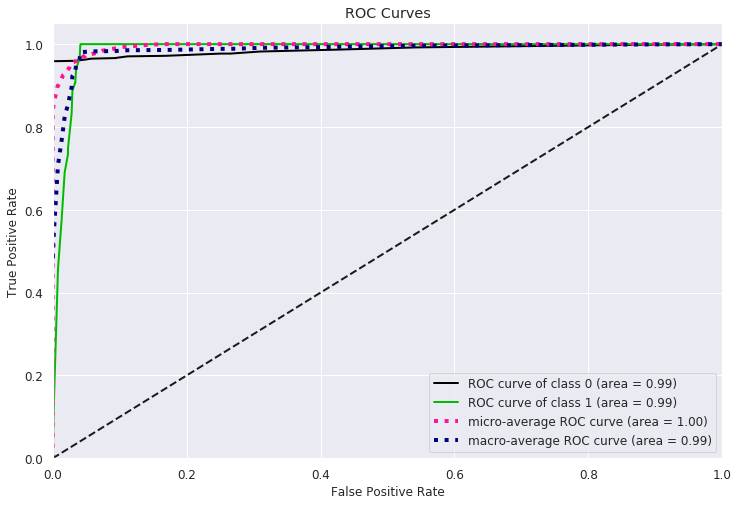

In [167]:
#FIT
rf_model_2 = RandomForestClassifier().fit(X_balanced, y_balanced)

#Predict
y_pred_2 = rf_model_2.predict(X_test)
Y_pred_2_proba = rf_model_2.predict_proba(X_test)

print(classification_report(y_test, y_pred_2))
rf_auc_smote = round(roc_auc_score(y_test, y_pred_2),4)

print('AUC curve {}' .format(rf_auc_smote))

skplt.metrics.plot_roc_curve(y_test, Y_pred_2_proba)
plt.show()

### 5.2 Logistic Regression

In [168]:
# Previsões

log_pred = LogisticRegression().fit(X_balanced, y_balanced)

log_pred = log_pred.predict(X_test)

#Report
print(classification_report(y_test, log_pred))

log_roc = round(roc_auc_score(y_test, log_pred),4)

print('AUC curve {}' .format(log_roc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2407
           1       0.77      1.00      0.87       339

    accuracy                           0.96      2746
   macro avg       0.89      0.98      0.93      2746
weighted avg       0.97      0.96      0.97      2746

AUC curve 0.9792


In [169]:
#Comparação dos modelos

modelos = {'Modelo': ['Logistic Regression', 'Random Forest', 'Random Forest(SMOTE)'], 'AUC': [log_roc, rf_auc_no_smote, rf_auc_smote ]}

table_final = pd.DataFrame.from_dict(modelos)
table_final

,Modelo,AUC
0,Logistic Regression,0.9792
1,Random Forest,0.9368
2,Random Forest(SMOTE),0.9792


### 6. Previsão final

In [179]:
#Preparando o dataset

teste = teste[treino_5.index]
teste = pd.get_dummies(teste, columns = ['TP_ST_CONCLUSAO','Q002'])

#Previsão com Random Forest
predictions = rf_model_2.predict(teste)

predictions

array([0, 0, 1, ..., 0, 0, 0])

In [180]:
# Salvando o arquivo

nu_inscricao['IN_TREINEIRO'] = predictions

nu_inscricao.to_csv('../enem-4/answer.csv', index = False)

## Referências: 
https://towardsdatascience.com/calculate-similarity-the-most-relevant-metrics-in-a-nutshell-9a43564f533e
    
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365